In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import random

In [2]:
X = load_boston().data
Y = load_boston().target

In [3]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)

In [5]:
clf = SGDRegressor()
clf.fit(X_train, Y_train)
print(mean_squared_error(Y_train, clf.predict(X_train)))
print(mean_squared_error(Y_test, clf.predict(X_test)))

20.677558259503048
31.113342629807182


In [6]:
clf.coef_

array([-0.98808149,  0.57390744, -0.64019298,  0.1933169 , -0.64567044,
        3.1024948 , -0.5035797 , -2.14165365,  0.89137728, -0.66374141,
       -1.95036916,  1.03729749, -3.15145491])

In [7]:
clf.intercept_

array([21.72974908])

In [8]:
Y.shape

(506,)

In [9]:
Y=Y.reshape(-1,1)
Y_train=Y_train.reshape(-1,1)
Y_test=Y_test.reshape(-1,1)

In [10]:
Y.shape

(506, 1)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339, 1)
(167, 1)


In [95]:
#matmul function documentation was found through a google search
#random documentation found at https://docs.python.org/3/library/random.html
def sdldw(wj,bj,Xj,Yj):
    ss1=0;
    rs=random.sample(range(Xj.shape[0]),88)
    for i in rs:
        ss1+=(Xj[i]*(Yj[i]-(np.matmul(wj,Xj[i])+bj)))
    ss2=ss1*(-2/88)        
    return ss2    

In [96]:
def sdldb(wj,bj,Xj,Yj):
    ss3=0;
    rs=random.sample(range(Xj.shape[0]),88)
    for i in rs:
        ss3+=((Yj[i]-(np.matmul(wj,Xj[i])+bj)))
    ss4=ss3*(-2/88)    
    return ss4

In [233]:
w_train=[]
for i in range(0,13,1):
    w_train.append(0)
w_train = np.asarray(w_train)    
b_train=0;
r=0.45;
s6=[];
for j in range(0,60,1):
    w_train=(w_train-(r*sdldw(w_train,b_train,X_train,Y_train)))
    b_train=(b_train-(r*sdldb(w_train,b_train,X_train,Y_train)))
    s5=0;    
    for i in range(0,X_train.shape[0],1):
        s5+=(Y_train[i]-(np.matmul(w_train,X_train[i])+b_train))**2;
    s6.extend(s5/(float(len(X_train))));
    r/=2;

In [277]:
print(w_train)
print(b_train)
print("MSE of our model on train data",s6[59])

[-0.932477   -0.62745386 -0.80894323  0.42492802 -0.76190596  3.49986154
 -1.12604976 -1.54733167  1.20421017 -0.51181513 -0.86492309  0.8490642
 -3.72036891]
[22.11039776]
MSE of our model on train data 23.21721152759955


In [179]:
w_test=[]
for i in range(0,13,1):
    w_test.append(0)
w_test = np.asarray(w_test)    
b_test=0;
r=0.45;
s8=[];
for j in range(0,60,1):
    w_test=(w_test-(r*sdldw(w_test,b_test,X_test,Y_test)))
    b_test=(b_test-(r*sdldb(w_test,b_test,X_test,Y_test)))
    s7=0;    
    for i in range(0,X_test.shape[0],1):
        s7+=(Y_test[i]-(np.matmul(w_test,X_test[i])+b_test))**2;
    s8.extend(s7/(float(len(X_test))));
    r/=2;

In [278]:
print(w_test)
print(b_test)
print("MSE of our model on test data",s8[59])

[ 0.80487295  0.5585325  -0.12876204  2.31416495 -1.29392543  3.51570941
  0.03464574 -0.78024323  0.40888316 -0.06753108 -2.43266108  0.5010735
 -3.58043321]
[22.85147878]
MSE of our model on test data 30.165280922109908


Text(0.5,0,'Number of iterations')

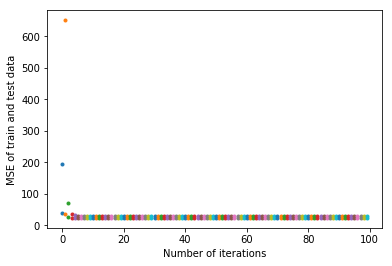

In [279]:
for i in range(0,100,1):
    plt.plot(i,s6[i],'.')
for i in range(0,100,1):
    plt.plot(i,s8[i],'.')
plt.ylabel("MSE of train and test data")
plt.xlabel("Number of iterations")

__After the first 5 or so iterations, the MSE doesn't decrease much for both train and test data. The MSE ends up being similar for both train and test data. Therefore, there is no overfitting. Also, after about 60 or so iterations, there is absolutely no decrease in MSE in either train or test data. So our final model will only have 60 iterations__

Text(0.5,0,'Number of iterations')

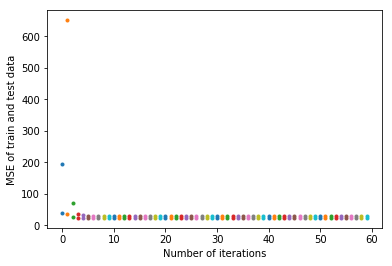

In [280]:
for i in range(0,60,1):
    plt.plot(i,s6[i],'.')
for i in range(0,60,1):
    plt.plot(i,s8[i],'.')
plt.ylabel("MSE of train and test data")
plt.xlabel("Number of iterations")

Text(0.5,0,'Actual values')

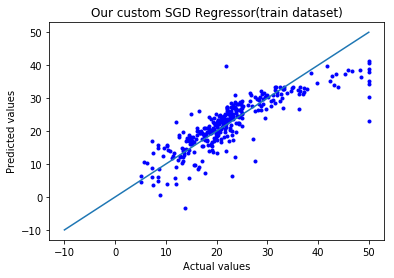

In [281]:
for i in range(0,X_train.shape[0],1):
    plt.plot(Y_train[i],(np.matmul(w_train,X_train[i])+b_train),'.',c='blue')
lx=np.linspace(-10,50,100)
ly=lx
plt.plot(lx,ly)
plt.title("Our custom SGD Regressor(train dataset)")
plt.ylabel('Predicted values')
plt.xlabel('Actual values')    

Text(0.5,0,'Actual values')

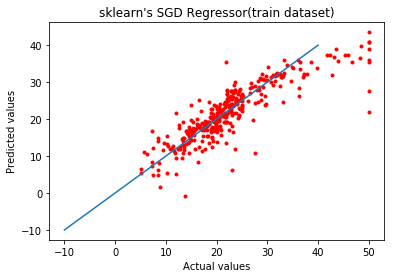

In [282]:
plt.plot(Y_train,clf.predict(X_train),'.',c='red')
lx=np.linspace(-10,40,100)
ly=lx
plt.plot(lx,ly)
plt.title("sklearn's SGD Regressor(train dataset)")
plt.ylabel('Predicted values')
plt.xlabel('Actual values')

Text(0.5,0,'Actual values')

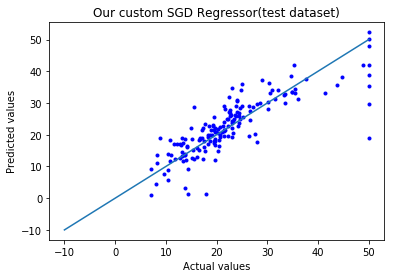

In [283]:
for i in range(0,X_test.shape[0],1):
    plt.plot(Y_test[i],(np.matmul(w_test,X_test[i])+b_test),'.',c='blue')
    lx=np.linspace(-10,50,100)
ly=lx
plt.plot(lx,ly)
plt.title("Our custom SGD Regressor(test dataset)")
plt.ylabel('Predicted values')
plt.xlabel('Actual values')    

Text(0.5,0,'Actual values')

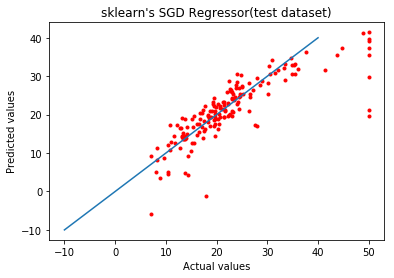

In [284]:
plt.plot(Y_test,clf.predict(X_test),'.',c='red')
lx=np.linspace(-10,40,100)
ly=lx
plt.plot(lx,ly)
plt.title("sklearn's SGD Regressor(test dataset)")
plt.ylabel('Predicted values')
plt.xlabel('Actual values')

In [285]:
Xtrainpred=[]
for i in range(0,X_train.shape[0],1):
    Xtrainpred.append(np.matmul(w_train,X_train[i])+b_train)

In [286]:
Xtestpred=[]
for i in range(0,X_test.shape[0],1):
    Xtestpred.append(np.matmul(w_test,X_test[i])+b_test)

Text(0.5,0,"Our model's predicted values")

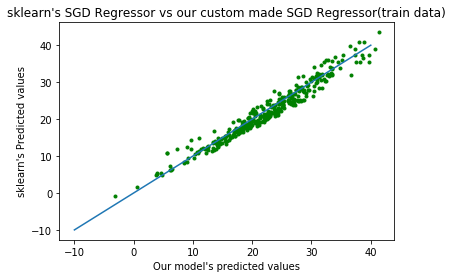

In [287]:
plt.plot(Xtrainpred,clf.predict(X_train),'.',c='green')
plt.title("sklearn's SGD Regressor vs our custom made SGD Regressor(train data)")
lx=np.linspace(-10,40,100)
ly=lx
plt.plot(lx,ly)
plt.ylabel("sklearn's Predicted values")
plt.xlabel("Our model's predicted values")

Text(0.5,0,"Our model's predicted values")

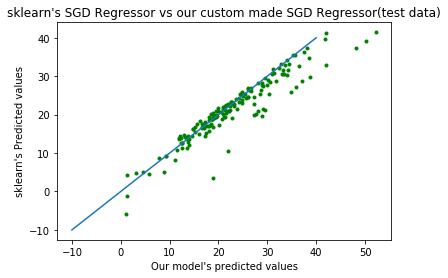

In [288]:
plt.plot(Xtestpred,clf.predict(X_test),'.',c='green')
plt.title("sklearn's SGD Regressor vs our custom made SGD Regressor(test data)")
lx=np.linspace(-10,40,100)
ly=lx
plt.plot(lx,ly)
plt.ylabel("sklearn's Predicted values")
plt.xlabel("Our model's predicted values")

In [289]:
from prettytable import PrettyTable
    
xt = PrettyTable()

column_names = ["Model", "MSE"]

xt.add_column(column_names[0], ["Our custom SGD Regressor(train)", "Our custom SGD Regressor(test)", "sklearn's SGD Regressor(train)", "sklearn's SGD Regressor(test)"])
xt.add_column(column_names[1], [s6[99], s8[99], mean_squared_error(Y_train, clf.predict(X_train)), mean_squared_error(Y_test, clf.predict(X_test))])
print(xt)

+---------------------------------+--------------------+
|              Model              |        MSE         |
+---------------------------------+--------------------+
| Our custom SGD Regressor(train) | 23.21721152759955  |
|  Our custom SGD Regressor(test) | 30.165280922109908 |
|  sklearn's SGD Regressor(train) | 20.677558259503048 |
|  sklearn's SGD Regressor(test)  | 31.113342629807182 |
+---------------------------------+--------------------+
